## Prepoznavanje gestikulacija - skup podataka Sign Language MNIST

![SignMNIST](Sign_Language_MNIST/amer_sign2.png)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

In [2]:
train_data = pd.read_csv('Sign_Language_MNIST/sign_mnist_train.csv')
test_data = pd.read_csv('Sign_Language_MNIST/sign_mnist_test.csv')

In [3]:
print(f'Ukupan broj instanci u skupu: {train_data.shape[0] + test_data.shape[0]}')

Ukupan broj instanci u skupu: 34627


In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train_labels = train_data['label'].values
train_data = train_data.drop('label', axis= 1).values

test_labels = test_data['label'].values
test_data = test_data.drop('label', axis= 1).values

### Informacije o skupu podataka

In [6]:
print(f'Dimenzije trening skupa: {train_data.shape}')

Dimenzije trening skupa: (27455, 784)


In [7]:
print(f'Dimenzije test skupa: {test_data.shape}')

Dimenzije test skupa: (7172, 784)


> Iz prethodnog zakljucujemo da skup podataka sadrzi:
> - 27455 instanci koje su namenjene za treniranje
> - 7172 instance koje su namenjene za testiranje
> Takodje, mozemo primetiti da je druga "dimenzija" kod oba skupa 784. Ona predstavlja pomnozenu visinu sa sirinom svake fotografije, koje originalno imaju dimenzije 25x25.

In [8]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

> Mozemo primetiti da medju oznakama klasa nedostaju brojevi 9 i 25. To je iz razloga sto znakovi <b>J</b> i <b>Z</b>, koji bi u numeraciji bili pod tim brojevima, ne mogu biti predstavljeni preko fotografija jer njihovo prezentovanje zahteva pokrete sake.

In [9]:
NUM_OF_CLASSES = np.unique(train_labels).size

print(f'Broj klasa: {NUM_OF_CLASSES}.')

Broj klasa: 24.


> Mapiramo numericke oznake u slova, kako bismo lakse razlikovali klase.

In [10]:
classes = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'NONE',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
}

In [11]:
class_counts = np.bincount(train_labels)
print(f'Distribucija klasa na trening skupu: ')

for i, count in enumerate(class_counts):
    print(f'Class {classes[i]}: {count}')

Distribucija klasa na trening skupu: 
Class A: 1126
Class B: 1010
Class C: 1144
Class D: 1196
Class E: 957
Class F: 1204
Class G: 1090
Class H: 1013
Class I: 1162
Class NONE: 0
Class K: 1114
Class L: 1241
Class M: 1055
Class N: 1151
Class O: 1196
Class P: 1088
Class Q: 1279
Class R: 1294
Class S: 1199
Class T: 1186
Class U: 1161
Class V: 1082
Class W: 1225
Class X: 1164
Class Y: 1118


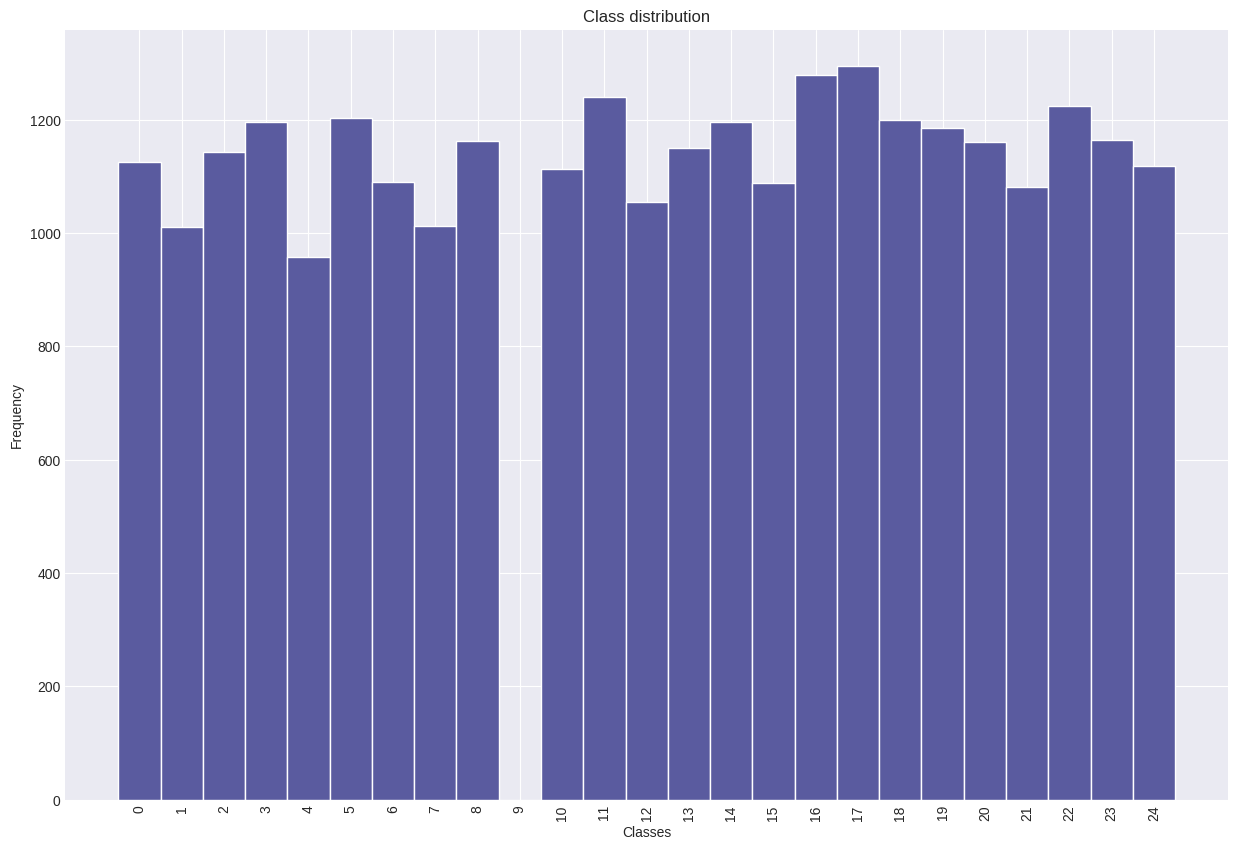

In [12]:
plt.figure(figsize= (15, 10))
plt.hist(train_labels, bins= np.arange(NUM_OF_CLASSES + 2) - 0.5, edgecolor= 'white')

plt.xticks(range(NUM_OF_CLASSES + 1), classes, rotation= 90)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class distribution')
plt.show()

#### Vizuelizacija podataka sa kojima radimo

In [13]:
import random

In [14]:
def plot_images(train_data, train_labels):
    plt.figure(figsize=(15, 10))

    for x in range(25):
        i = random.randrange(0, train_data.shape[0] + 1)
        
        plt.subplot(5, 5, x+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        plt.imshow(train_data[i].reshape((28, 28)), cmap= 'gray')
        plt.xlabel(classes[train_labels[i]])
    plt.show()

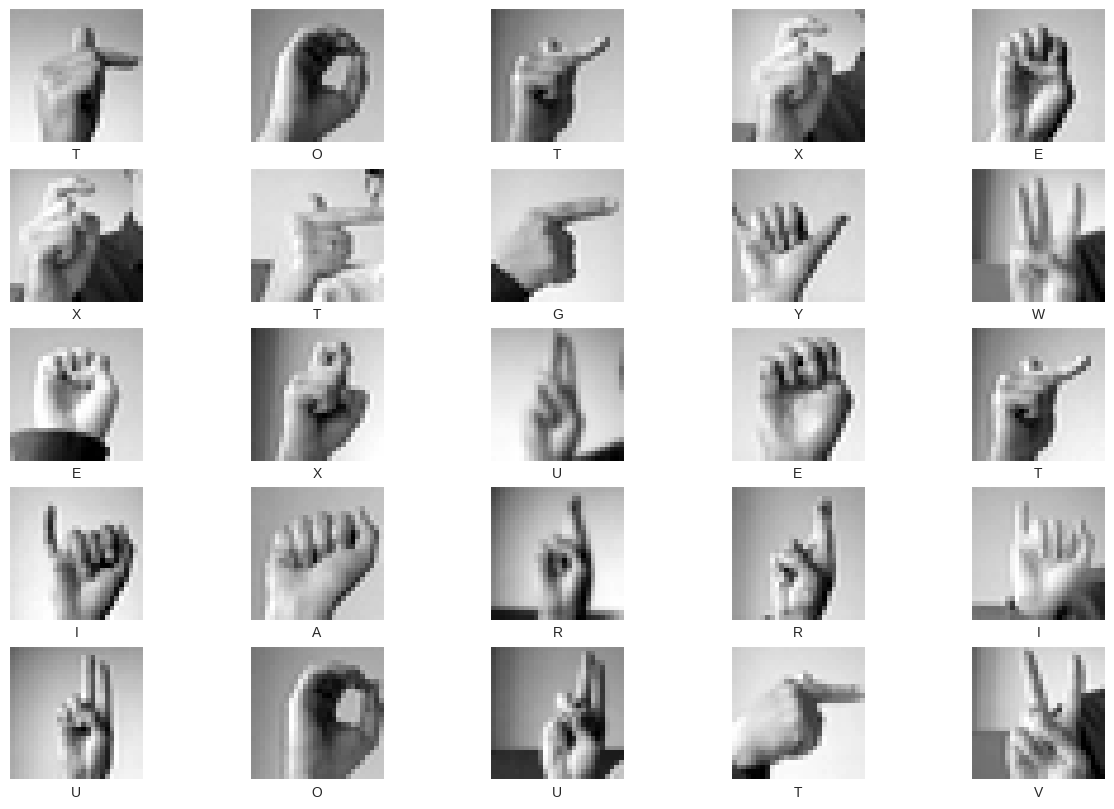

In [15]:
plot_images(train_data, train_labels)

Posto smo prethodno mogli da vidimo da je svaka slika predstavljena kao _vektor_, a ne kao _matrica_, vrsimo konverziju vektora u matricu. Osim preoblikovanja podataka, vrsimo i normalizaciju piksela da bismo imali konzistentnu skalu.

In [16]:
IMG_SIZE = 28

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
test_data = test_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0

In [17]:
train_data.shape

(27455, 28, 28, 1)

In [18]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
label_binrizer.fit(train_labels)

train_labels = label_binrizer.transform(train_labels)
test_labels = label_binrizer.transform(test_labels)

In [19]:
train_labels[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

> Dobili smo vektor koji na i-tom mestu ima jedinicu, a na svim ostalim nule. Ovo nam je potrebno zbog dimenzija elemenata u neuronskoj mrezi, a jedinica oznacava konkretnu klasu kojoj fotografija pripada.

### Kreiranje razlicitih modela

Posto radimo klasifikaciju sa fotografijama, polazimo od jednostavne <b>konvolutivne neuronske mreze</b>. Za ove potrebe koristicemo `tensorflow` i `keras`.

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import models

2024-09-25 21:01:59.066056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 21:01:59.554540: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-25 21:01:59.649643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-25 21:01:59.649675: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [21]:
def simple_cnn_model():
    simple_cnn = models.Sequential([
        Conv2D(32, (3, 3), activation= 'relu', input_shape= (IMG_SIZE, IMG_SIZE, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation= 'relu'),
        Flatten(),
        Dense(63, activation= 'relu'),
        Dense(NUM_OF_CLASSES, activation= 'softmax')
    ])
    
    simple_cnn.compile(optimizer= 'adam', loss= CategoricalCrossentropy(), metrics= 'accuracy')
    return simple_cnn

In [22]:
simple_cnn = simple_cnn_model()
simple_cnn.summary()

2024-09-25 21:02:03.680376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-09-25 21:02:03.680756: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-25 21:02:03.680793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (milica): /proc/driver/nvidia/version does not exist
2024-09-25 21:02:03.681610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 63)                243999    
                                                                 
 dense_1 (Dense)             (None, 24)                1536      
                                                        

In [23]:
simple_cnn_history = simple_cnn.fit(train_data, train_labels, batch_size= 32, epochs= 10)

Epoch 1/10
858/858 [==============================] - 11s 11ms/step - loss: 0.9714 - accuracy: 0.7087
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0570 - accuracy: 0.9882
Epoch 3/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0232 - accuracy: 0.9954
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 5/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 6/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0145 - accuracy: 0.9960
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 8/10
858/858 [==============================] - 10s 12ms/step - loss: 1.6075e-04 - accuracy: 1.0000
Epoch 9/10
858/858 [==============================] - 10s 11ms/step - loss: 8.4329e-05 - accuracy: 1.0000
Epoch 10/10
858/858 [==============================] - 10s 12ms/step - los

Kao naredni model koristicemo <b>duboko povezanu konvolutivnu neuronsku mrezu</b> koja ce imati vise poredjanih slojeva konvolucije i agregacije. Takodje, koristicemo tehniku _Dropout_ kako bismo smanjili mogucnost preprilagodjavanja modela na trening podacima.

In [24]:
def deep_cnn_model():
    deep_cnn = models.Sequential([
        Conv2D(64, (3, 3), activation= 'relu', input_shape= (IMG_SIZE, IMG_SIZE, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.10),
        
        Conv2D(64, (3, 3), activation= 'relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.10),
        
        Conv2D(64, (3, 3), activation= 'relu'),
        Flatten(),
        Dense(32, activation= 'relu'),
        Dropout(0.10),
        Dense(NUM_OF_CLASSES, activation= 'softmax')
    ])
    
    deep_cnn.compile(optimizer= 'adam', loss= CategoricalCrossentropy(), metrics= 'accuracy')
    return deep_cnn

In [25]:
deep_cnn = deep_cnn_model()
deep_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [26]:
deep_cnn_history = deep_cnn.fit(train_data, train_labels, epochs= 10, batch_size= 32, shuffle= True)

Epoch 1/10
858/858 [==============================] - 23s 25ms/step - loss: 1.7050 - accuracy: 0.4608
Epoch 2/10
858/858 [==============================] - 22s 26ms/step - loss: 0.4744 - accuracy: 0.8377
Epoch 3/10
858/858 [==============================] - 23s 26ms/step - loss: 0.2366 - accuracy: 0.9205
Epoch 4/10
858/858 [==============================] - 22s 26ms/step - loss: 0.1433 - accuracy: 0.9526
Epoch 5/10
858/858 [==============================] - 22s 26ms/step - loss: 0.1026 - accuracy: 0.9656
Epoch 6/10
858/858 [==============================] - 23s 26ms/step - loss: 0.0823 - accuracy: 0.9728
Epoch 7/10
858/858 [==============================] - 22s 25ms/step - loss: 0.0677 - accuracy: 0.9771
Epoch 8/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0584 - accuracy: 0.9811
Epoch 9/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0522 - accuracy: 0.9822
Epoch 10/10
858/858 [==============================] - 23s 27ms/step - loss: 0.042

> Vidimo da na ovaj nacin model na trening podacima daje _manju_ tacnost nego sto je to bilo pri treniranju prvog modela gde je tacnost na kraju bila _1_.

In [27]:
from keras_tuner.tuners import RandomSearch

Naredni pokusaj ukljucuje kreiranje modela uz ucenje o parametrima koji ce doprineti kreiranju najboljeg modela. U te svrhe koristimo <b>RandomSearch</b> koji je jedan od tunera iz biblioteke keras-tuners. Osim njega postoje jos neke varijante koje je moguce koristiti:
- [GridSearch](https://keras.io/api/keras_tuner/tuners/grid/)
- [BayesianOptimization](https://keras.io/api/keras_tuner/tuners/bayesian/)
- [Hyperband](https://keras.io/api/keras_tuner/tuners/hyperband/)

Za detaljnije opise ostavljeni su linkovi do dokumentacije.

In [28]:
def create_model(hyperparameters):
    model = models.Sequential([
        Conv2D(hyperparameters.Int('num_filters_l1', 32, 256, step= 32), 
                                 kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        MaxPooling2D((2, 2)),

        Conv2D(hyperparameters.Int('num_filters_l2', 32, 256, step=32), 
                                 kernel_size=(3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(hyperparameters.Int('dense_units1', 32, 256, step=32), activation='relu'),
        Dense(hyperparameters.Int('dense_units2', 32, 256, step=32), activation='relu'),
        Dense(NUM_OF_CLASSES, activation='softmax')
    ])
    
    model.compile(optimizer= 'adam', loss= CategoricalCrossentropy(), metrics= 'accuracy')
    return model

In [29]:
tuner = RandomSearch(create_model, objective= 'accuracy', max_trials= 5, executions_per_trial= 1)

Reloading Tuner from ./untitled_project/tuner0.json


In [31]:
tuner.search(train_data, train_labels, epochs= 10)

tuner_model = tuner.get_best_models(num_models= 1)[0]
tuner_history = tuner_model.fit(train_data, train_labels, epochs= 10, batch_size= 32, shuffle= True)

Epoch 1/10
858/858 [==============================] - 12s 13ms/step - loss: 8.8060e-05 - accuracy: 1.0000
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 5.2060e-05 - accuracy: 1.0000
Epoch 3/10
858/858 [==============================] - 11s 12ms/step - loss: 3.2454e-05 - accuracy: 1.0000
Epoch 4/10
858/858 [==============================] - 11s 13ms/step - loss: 2.0589e-05 - accuracy: 1.0000
Epoch 5/10
858/858 [==============================] - 11s 12ms/step - loss: 1.3641e-05 - accuracy: 1.0000
Epoch 6/10
858/858 [==============================] - 11s 13ms/step - loss: 9.2094e-06 - accuracy: 1.0000
Epoch 7/10
858/858 [==============================] - 11s 12ms/step - loss: 6.0487e-06 - accuracy: 1.0000
Epoch 8/10
858/858 [==============================] - 11s 13ms/step - loss: 3.7115e-06 - accuracy: 1.0000
Epoch 9/10
858/858 [==============================] - 12s 13ms/step - loss: 0.0380 - accuracy: 0.9894
Epoch 10/10
858/858 [=============================

Poslednji model bice vec trenirani model <b>ResNet-50</b>. Arhitektura modela data je na narednoj fotografiji:


![ResNet](resnet50.)

In [32]:
resnet = tf.keras.applications.ResNet50(weights= 'imagenet', input_shape= (32, 32, 3), include_top= False)

resnet_model = models.Sequential([
    resnet,
    GlobalAveragePooling2D(),
    Dense(NUM_OF_CLASSES, activation= 'softmax')
])

resnet_model.compile(optimizer= 'adam', loss= CategoricalCrossentropy(), metrics= 'accuracy')

In [33]:
train_data_reshaped = tf.image.resize(train_data, (32, 32))
test_data_reshaped = tf.image.resize(test_data, (32, 32))

In [34]:
train_data_reshaped.shape

TensorShape([27455, 32, 32, 1])

In [35]:
train_data_color = tf.image.grayscale_to_rgb(train_data_reshaped)
test_data_color = tf.image.grayscale_to_rgb(test_data_reshaped)

In [36]:
train_data_color.shape

TensorShape([27455, 32, 32, 3])

In [37]:
resnet_history = resnet_model.fit(train_data_color, train_labels, epochs= 5, batch_size= 32)

Epoch 1/5
858/858 [==============================] - 468s 533ms/step - loss: 1.2151 - accuracy: 0.7418
Epoch 2/5
858/858 [==============================] - 469s 547ms/step - loss: 0.8787 - accuracy: 0.8149
Epoch 3/5
858/858 [==============================] - 461s 537ms/step - loss: 0.2901 - accuracy: 0.9373
Epoch 4/5
858/858 [==============================] - 450s 524ms/step - loss: 0.2532 - accuracy: 0.9499
Epoch 5/5
858/858 [==============================] - 458s 534ms/step - loss: 0.8040 - accuracy: 0.8382


### Procene kvaliteta kreiranih modela

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
y_pred_simple_cnn = simple_cnn.predict(test_data)
simple_cnn_acc = accuracy_score(np.argmax(test_labels, axis= 1), np.argmax(y_pred_simple_cnn, axis= 1))

225/225 [==============================] - 1s 6ms/step


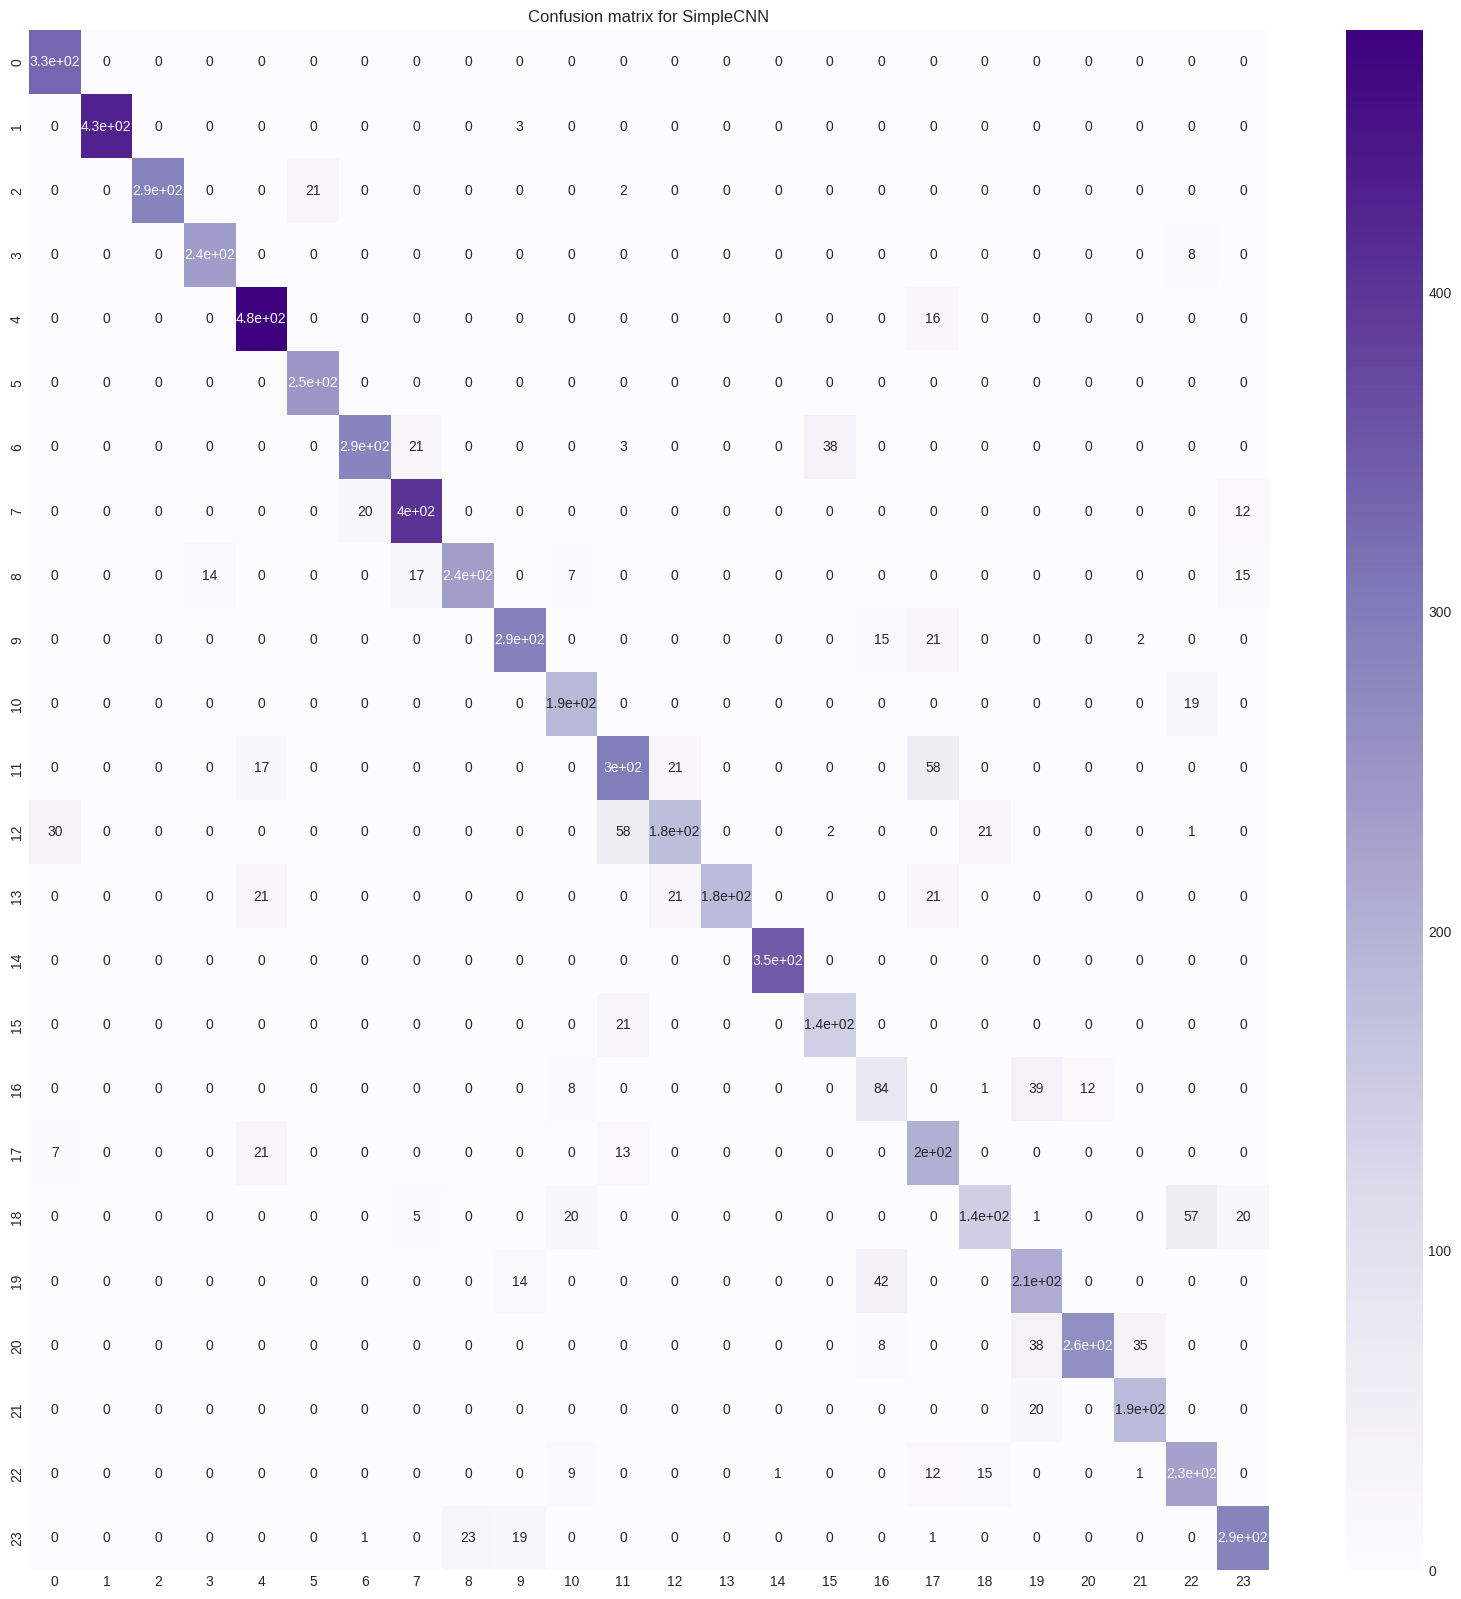

In [58]:
cm = confusion_matrix(np.argmax(test_labels, axis= 1), np.argmax(y_pred_simple_cnn, axis= 1))

plt.figure(figsize= (20, 20))
plt.title('Confusion matrix for SimpleCNN')
sns.heatmap(cm, annot= True, cmap= 'Purples')
plt.show()

In [41]:
print(f'Accuracy for SimpleCNN: {simple_cnn_acc}')

Accuracy for SimpleCNN: 0.8621026213050753


In [42]:
y_pred_deep_cnn = deep_cnn.predict(test_data)
deep_cnn_acc = accuracy_score(np.argmax(test_labels, axis= 1), np.argmax(y_pred_deep_cnn, axis= 1))

225/225 [==============================] - 3s 11ms/step


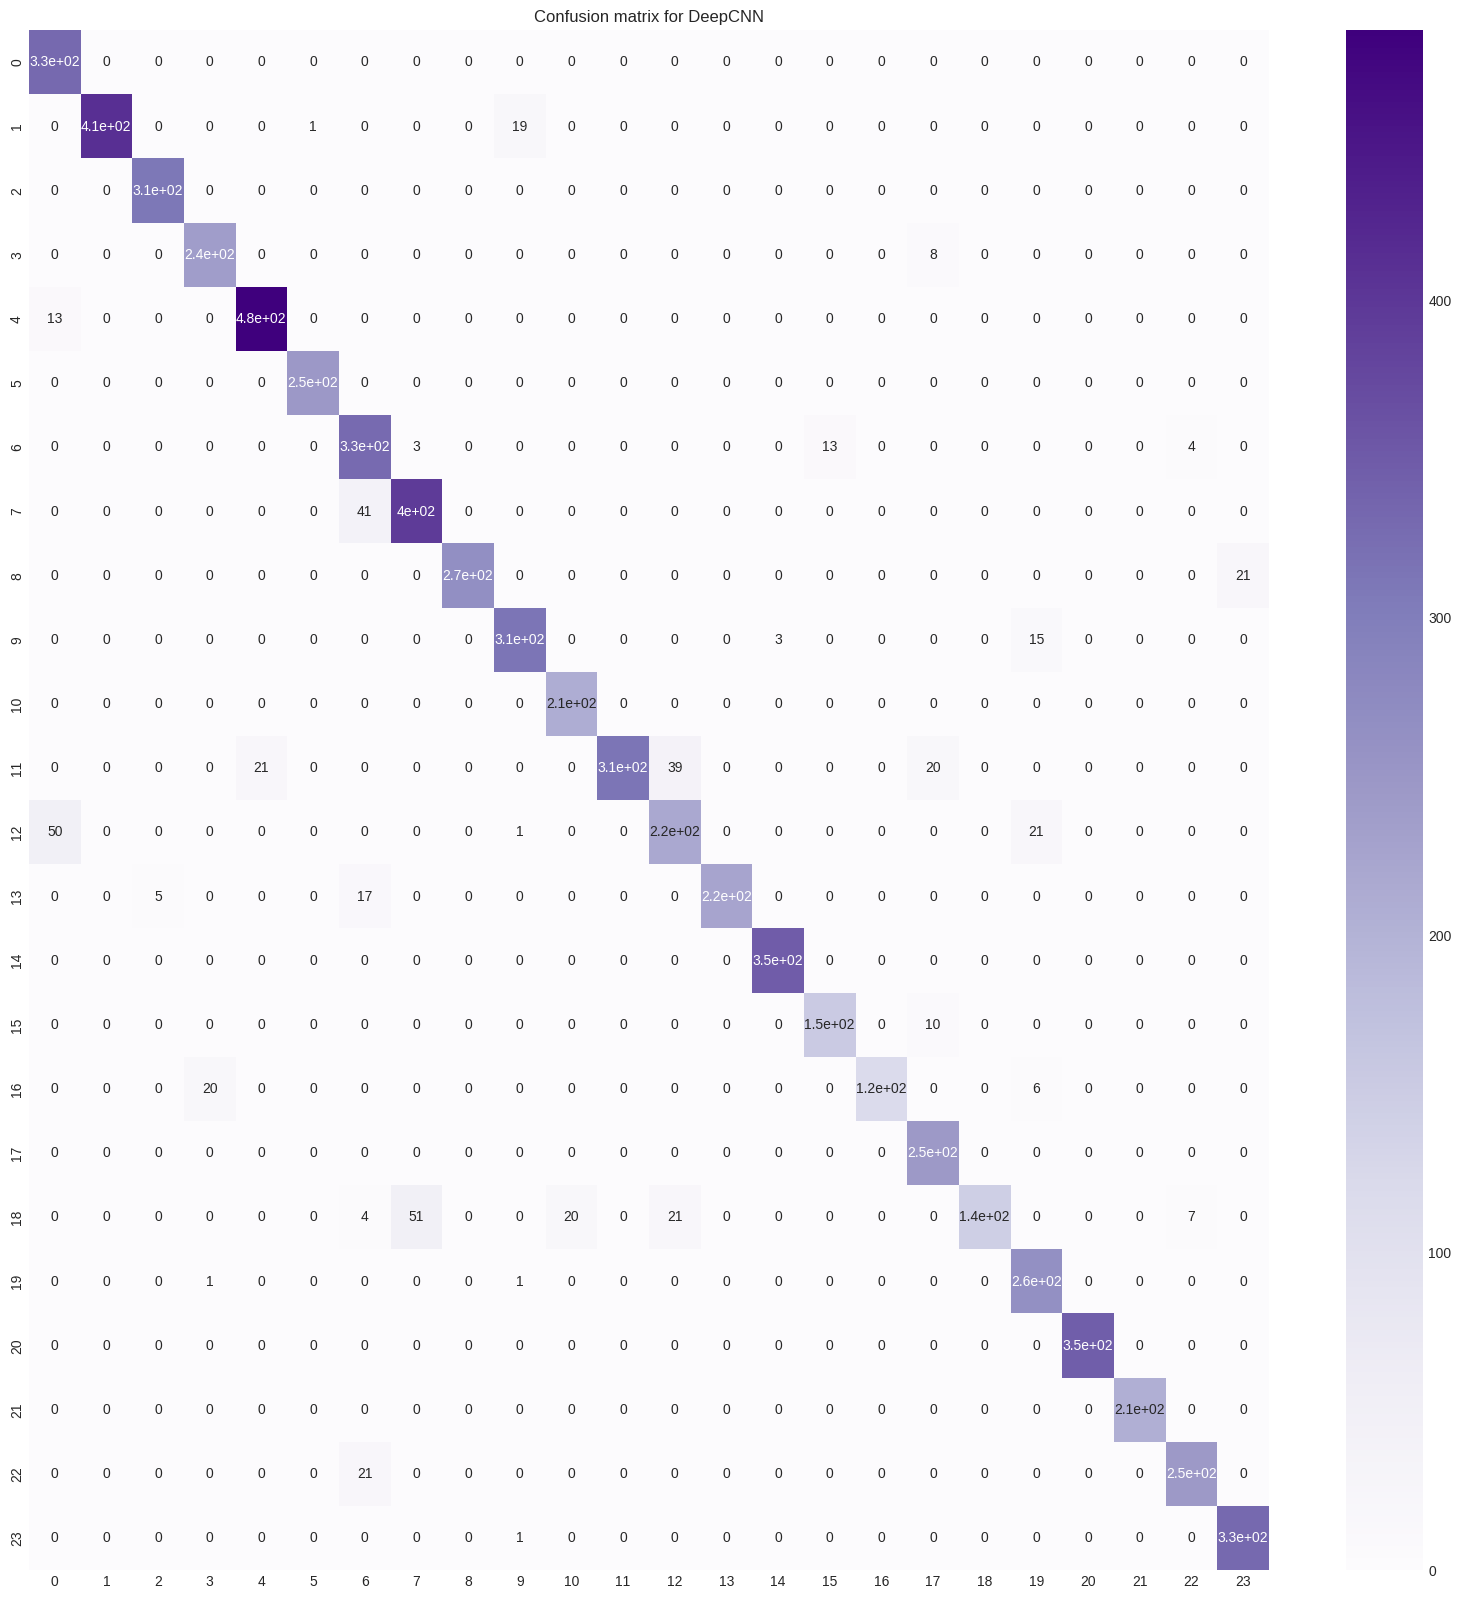

In [59]:
cm = confusion_matrix(np.argmax(test_labels, axis= 1), np.argmax(y_pred_deep_cnn, axis= 1))

plt.figure(figsize= (20, 20))
plt.title('Confusion matrix for DeepCNN')
sns.heatmap(cm, annot= True, cmap= 'Purples')
plt.show()

In [43]:
print(f'Accuracy for DeepCNN: {deep_cnn_acc}')

Accuracy for DeepCNN: 0.9333519241494702


In [44]:
y_pred_tuner = tuner_model.predict(test_data)
tuner_acc = accuracy_score(np.argmax(test_labels, axis= 1), np.argmax(y_pred_tuner, axis= 1))

225/225 [==============================] - 2s 6ms/step


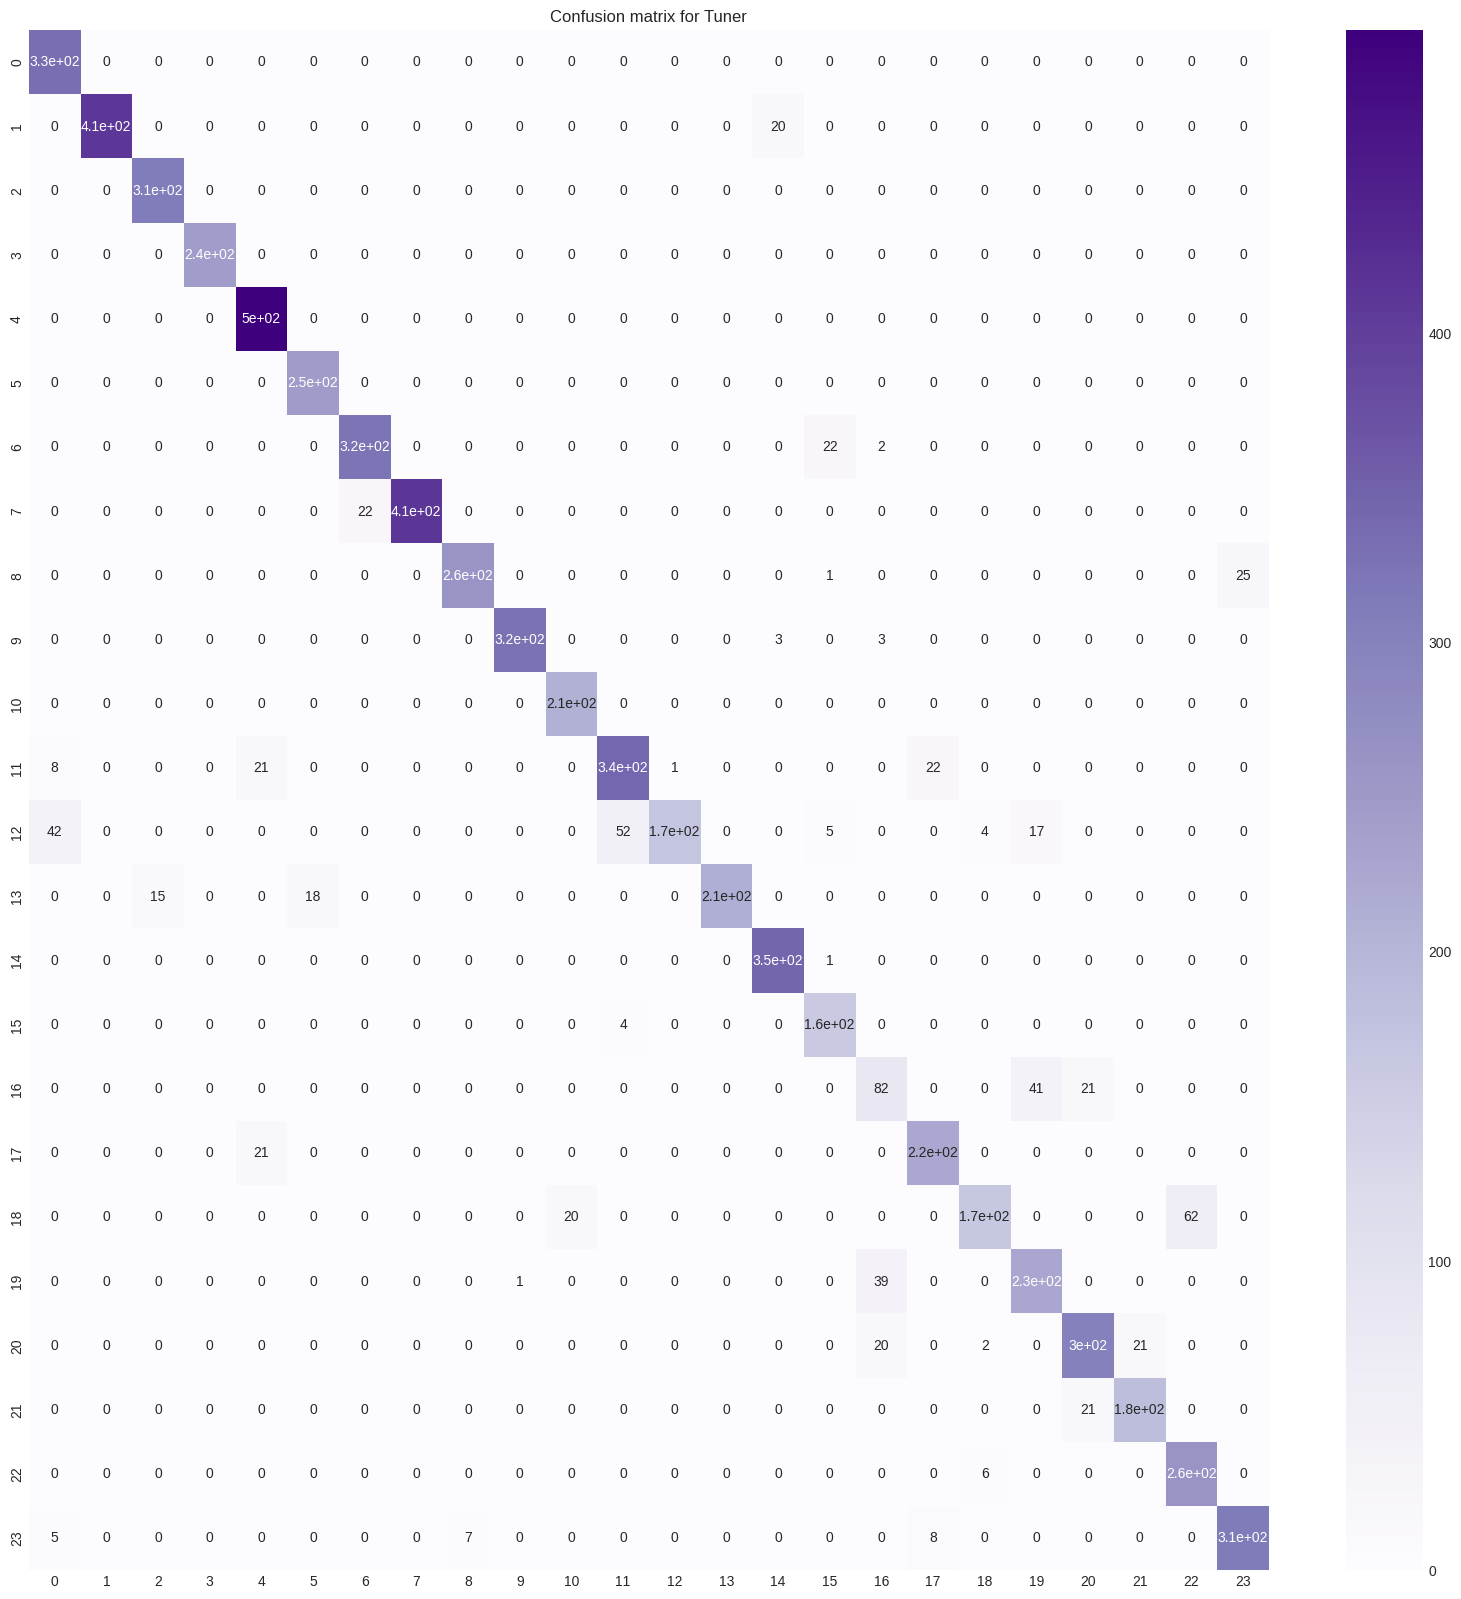

In [60]:
cm = confusion_matrix(np.argmax(test_labels, axis= 1), np.argmax(y_pred_tuner, axis= 1))

plt.figure(figsize= (20, 20))
plt.title('Confusion matrix for Tuner')
sns.heatmap(cm, annot= True, cmap= 'Purples')
plt.show()

In [45]:
print(f'Accuracy for Tuner: {tuner_acc}')

Accuracy for Tuner: 0.9159230340211936


In [46]:
y_pred_resnet = resnet_model.predict(test_data_color)
resnet_acc = accuracy_score(np.argmax(test_labels, axis= 1), np.argmax(y_pred_resnet, axis= 1))

225/225 [==============================] - 34s 142ms/step


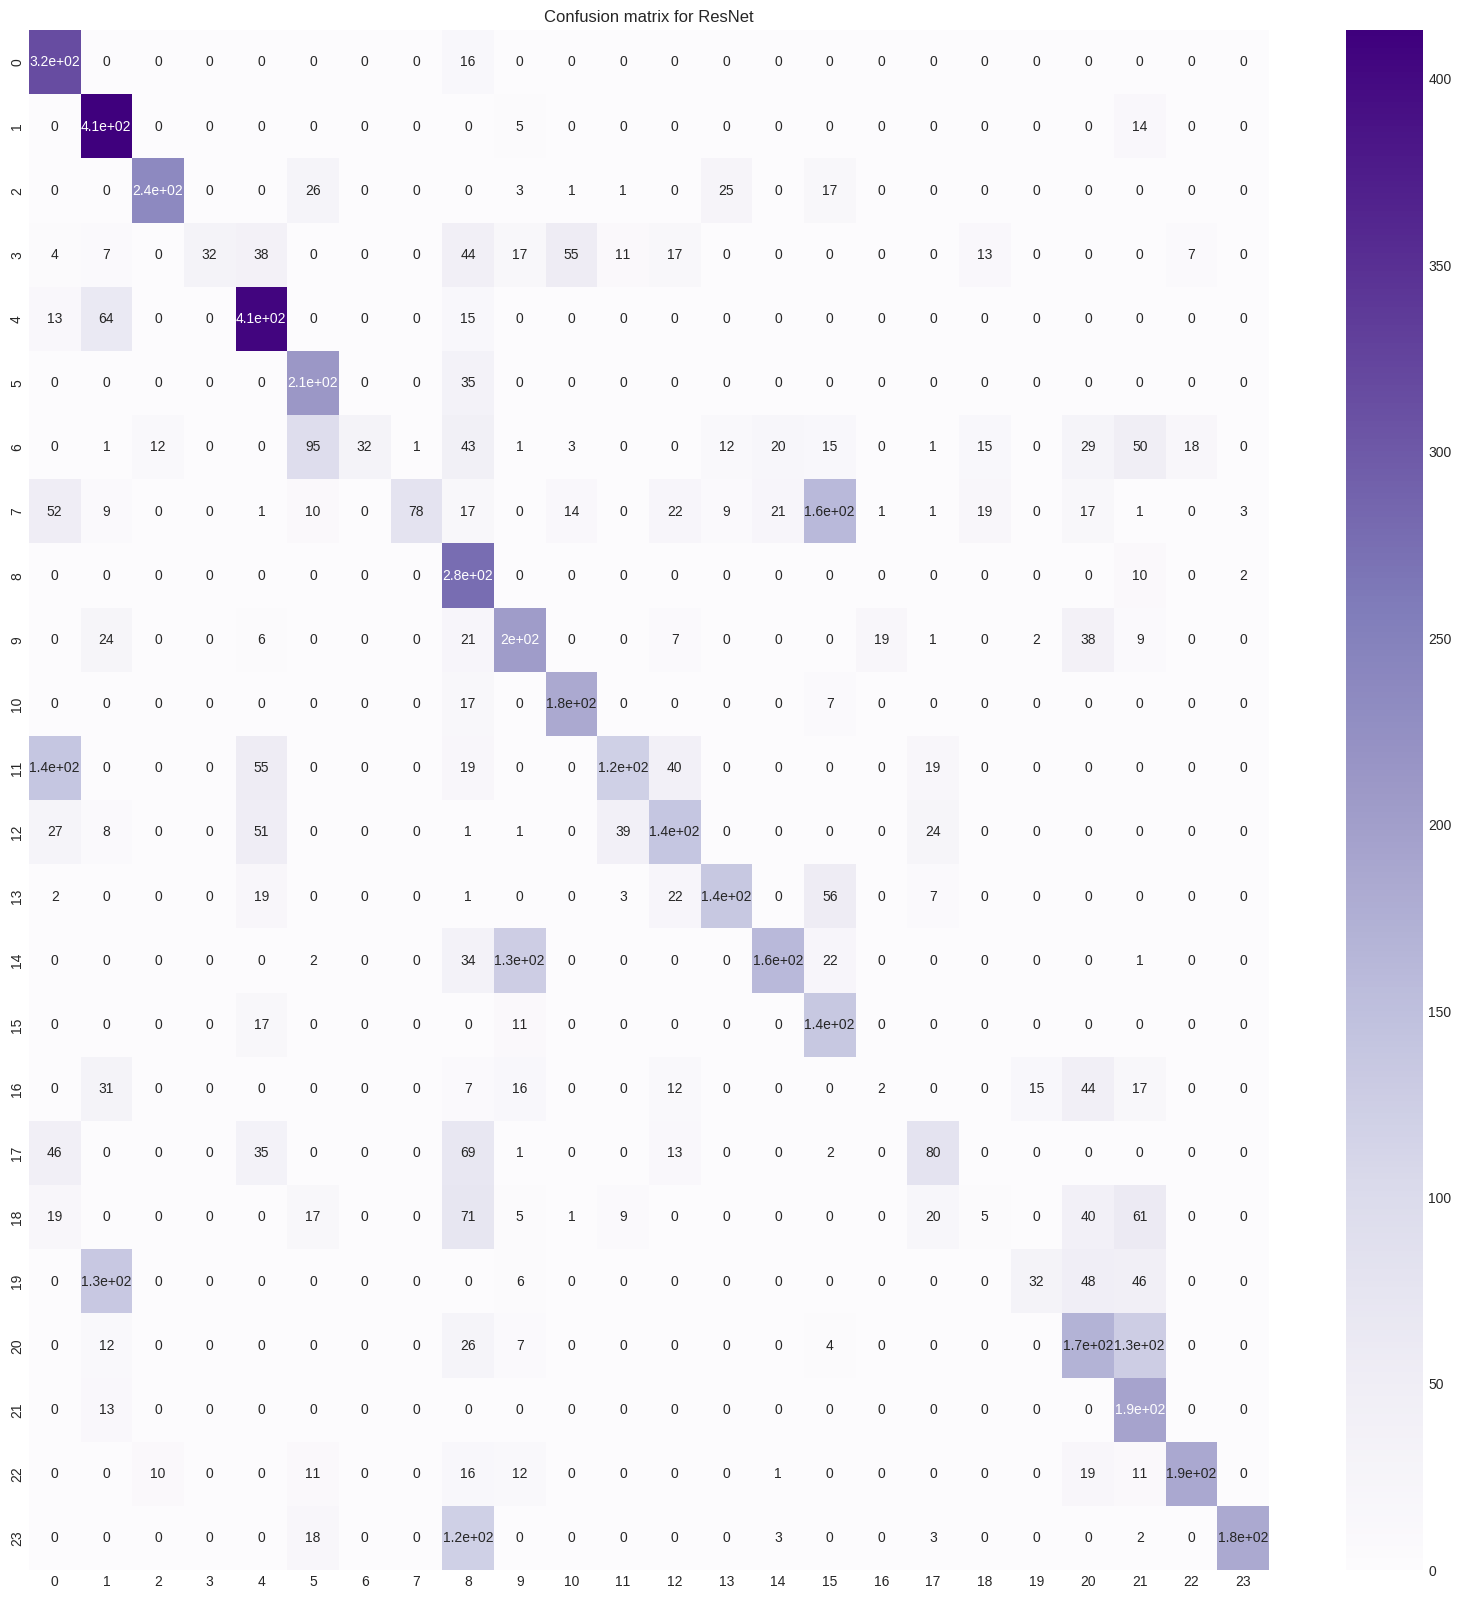

In [61]:
cm = confusion_matrix(np.argmax(test_labels, axis= 1), np.argmax(y_pred_resnet, axis= 1))

plt.figure(figsize= (20, 20))
plt.title('Confusion matrix for ResNet')
sns.heatmap(cm, annot= True, cmap= 'Purples')
plt.show()

In [47]:
print(f'Accuracy for ResNet: {resnet_acc}')

Accuracy for ResNet: 0.5492191857222533


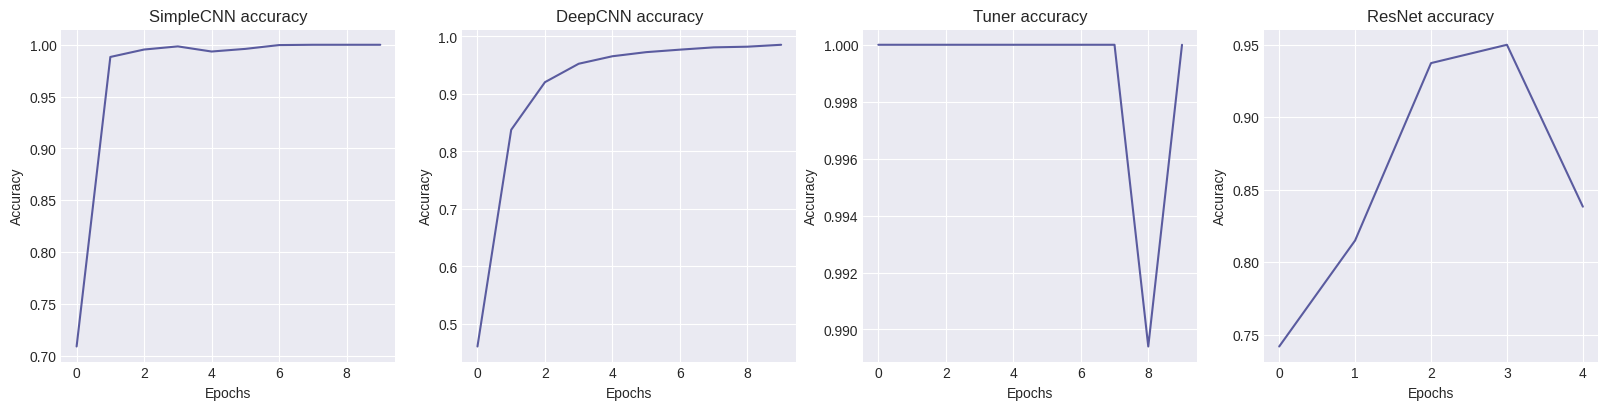

In [55]:
models = [simple_cnn_history, deep_cnn_history, tuner_history, resnet_history]
model_names = ['SimpleCNN', 'DeepCNN', 'Tuner', 'ResNet']

plt.figure(figsize= (25, 25))
for i, model in enumerate(models):
    plt.subplot(5, 5, i + 1)
    plt.plot(model.history['accuracy'], label= f'{model_names[i]} accuracy')
    
    plt.title(f'{model_names[i]} accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
plt.show()